<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Movie-Data-Analysis" data-toc-modified-id="Movie-Data-Analysis-1">Movie Data Analysis</a></span></li><li><span><a href="#Data-Uploading-and-Scrubbing" data-toc-modified-id="Data-Uploading-and-Scrubbing-2">Data Uploading and Scrubbing</a></span></li><li><span><a href="#Merge-the-different-data-sets-to-one-data-set" data-toc-modified-id="Merge-the-different-data-sets-to-one-data-set-3">Merge the different data sets to one data set</a></span></li><li><span><a href="#Data-Visualization" data-toc-modified-id="Data-Visualization-4">Data Visualization</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-5">Conclusion</a></span></li></ul></div>

<h1>Movie Data Analysis</h1>
<br></br>
<div><b> Microsoft wants to venture into creating Movies.We want to help Microsoft in understanding what kind of movies are profitable and what is the best time to release them. This notebook contains analysis from data obtained from different websites such as Box Office Mojo, IMDB, Rotten Toamtoes and The Movie DB. We are going to clean the data from these sites and visualize them to understand what movies do well at the Box Office.</b>
</div>
<br>We will try to answer the following questions to come to a conclusion that may help Microsoft.<br>
<div><b>Q1- How has the trend of the Movie Industry been in the last decade?<br>
Q2- What seasons bring out most profitable movies?<br>
Q3- What are the most successful Genres?<br>
Q4- What is the best season for each Genre?<br>
Q5- What has been the trend of Movie runtime by Genre?</b><br>
</div>

In [711]:
# Importing the Libraries
import datetime
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [712]:
## To display  all the interactive output without using the print function
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Data Uploading and Scrubbing

In [713]:
# Uploading the Data Sheet and creating a Data Frame
df_budget = pd.read_csv('/Users/Vidya/Flatiron/Project/data/tn.movie_budgets.csv')
df_budget.head()
df_budget.info()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [714]:
# Formatting the Release Date column
df_budget['release_date'] = pd.to_datetime(df_budget['release_date'], infer_datetime_format=True)
df_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [715]:
# Replacing the '$' sign
df_budget['production_budget'] = df_budget['production_budget'].str.replace('$','')
df_budget['domestic_gross'] = df_budget['domestic_gross'].str.replace('$', '')
df_budget['worldwide_gross'] = df_budget['worldwide_gross'].str.replace('$', '')
df_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,"425,000,000","760,507,625","2,776,345,279"
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"410,600,000","241,063,875","1,045,663,875"
2,3,2019-06-07,Dark Phoenix,"350,000,000","42,762,350","149,762,350"
3,4,2015-05-01,Avengers: Age of Ultron,"330,600,000","459,005,868","1,403,013,963"
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"317,000,000","620,181,382","1,316,721,747"


In [716]:
# Delete commas from "production_budget,domestic_gross and worldwide_gross columns"
df_budget['production_budget'] = df_budget['production_budget'].str.replace(',', '')
df_budget['domestic_gross'] = df_budget['domestic_gross'].str.replace(',', '')
df_budget['worldwide_gross'] = df_budget['worldwide_gross'].str.replace(',', '')
df_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000,760507625,2776345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [717]:
# Importing the re library to remove all spaces from movie column which will help to merge files later
import re
df_budget['movie'] = df_budget['movie'].apply(lambda x: re.sub(r'\W+','',x.lower()))
df_budget.sample(5)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5031,32,2013-12-31,independencedaysaster,1800000,0,0
4924,25,2018-06-08,heartsbeatloud,2000000,2386254,2420962
4332,33,1998-08-14,slumsofbeverlyhills,5000000,5502773,5502773
5165,66,2013-04-19,homerun,1200000,2859955,2859955
1872,73,2001-02-16,downtoearth,30000000,64172251,71172251


In [718]:
# Storing as int64 to hold large numeric values that will help in calculations
df_budget['production_budget'] = df_budget['production_budget'].astype('int64')
df_budget['domestic_gross'] = df_budget['domestic_gross'].astype('int64')
df_budget['worldwide_gross'] = df_budget['worldwide_gross'].astype('int64')

# Dropping unnecessary columns
df_budget = df_budget.drop(columns = ['id'])
df_budget.sample(5)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
4892,1972-08-11,everythingyoualwayswantedtoknow,2000000,18016290,18016290
423,2015-02-06,seventhson,95000000,17725785,108874967
91,2018-07-27,missionimpossibleâfallout,178000000,220159104,787456552
3246,2001-01-12,savethelastdance,13000000,91038276,122244329
1262,1994-07-20,theclient,45000000,92115211,117615211


In [719]:
df_budget['Revenue'] = df_budget['domestic_gross'] + df_budget['worldwide_gross']
df_budget['Profit'] = df_budget['Revenue'] - df_budget['production_budget']
df_budget.sample(3)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,Revenue,Profit
5697,2015-11-10,thenightvisitor,100000,0,0,0,-100000
880,2000-04-07,rulesofengagement,60000000,61322858,71719931,133042789,73042789
660,1995-07-07,firstknight,75000000,37361412,127361412,164722824,89722824


In [720]:
#Dropping duplicate rows
df_budget.drop_duplicates(subset=None, keep='first')
df_budget.duplicated().value_counts()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,Revenue,Profit
0,2009-12-18,avatar,425000000,760507625,2776345279,3536852904,3111852904
1,2011-05-20,piratesofthecaribbeanonstrangertides,410600000,241063875,1045663875,1286727750,876127750
2,2019-06-07,darkphoenix,350000000,42762350,149762350,192524700,-157475300
3,2015-05-01,avengersageofultron,330600000,459005868,1403013963,1862019831,1531419831
4,2017-12-15,starwarsepviiithelastjedi,317000000,620181382,1316721747,1936903129,1619903129
...,...,...,...,...,...,...,...
5777,2018-12-31,red11,7000,0,0,0,-7000
5778,1999-04-02,following,6000,48482,240495,288977,282977
5779,2005-07-13,returntothelandofwonders,5000,1338,1338,2676,-2324
5780,2015-09-29,aplaguesopleasant,1400,0,0,0,-1400


False    5782
dtype: int64

In [721]:
# Uploading the Data Sheet and creating a Data Frame for the title_basics file
df_genres = pd.read_csv('/Users/Vidya/Flatiron/Project/data/title.basics.csv')
df_genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [722]:
# Dropping any duplicates
df_genres.drop_duplicates(subset=None, keep='first')
df_genres.duplicated().value_counts()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


False    146144
dtype: int64

In [723]:
# Renaming the column original_title
df_genres = df_genres.rename(columns={'original_title' : 'movie'})
#Removing white spaces from the column movie so that it will be easier to merge the file later on.
df_genres['movie']=df_genres['movie'].astype(str)
df_genres['movie'] = df_genres['movie'].apply(lambda y: re.sub(r'\W+','',y.lower()))
df_genres.head()

,tconst,primary_title,movie,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,ashadkaekdin,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,theothersideofthewind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,sabsebadasukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,latelenovelaerrante,2017,80.0,"Comedy,Drama,Fantasy"


In [724]:
# Dropping unnecessary columns
df_genres = df_genres.drop(columns = ['primary_title','start_year'])
df_genres.head()

,tconst,movie,runtime_minutes,genres
0,tt0063540,sunghursh,175.0,"Action,Crime,Drama"
1,tt0066787,ashadkaekdin,114.0,"Biography,Drama"
2,tt0069049,theothersideofthewind,122.0,Drama
3,tt0069204,sabsebadasukh,NaN,"Comedy,Drama"
4,tt0100275,latelenovelaerrante,80.0,"Comedy,Drama,Fantasy"


In [725]:
# Uploading the Data Sheet and creating a Data Frame for the title_ratings file
df_rating = pd.read_csv('/Users/Vidya/Flatiron/Project/data/title.ratings.csv')
df_rating

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [726]:
# Merging files df_genres and df_rating
df_genre_rating = df_genres.merge(df_rating, on='tconst')
# Dropping duplicates
df_genre_rating.drop_duplicates(subset=None, keep='first')
df_genre_rating.duplicated().value_counts()

,tconst,movie,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,sunghursh,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,ashadkaekdin,114.0,"Biography,Drama",7.2,43
2,tt0069049,theothersideofthewind,122.0,Drama,6.9,4517
3,tt0069204,sabsebadasukh,NaN,"Comedy,Drama",6.1,13
4,tt0100275,latelenovelaerrante,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...
73851,tt9913084,diaboliksonoio,75.0,Documentary,6.2,6
73852,tt9914286,sokaginçocuklari,98.0,"Drama,Family",8.7,136
73853,tt9914642,albatross,NaN,Documentary,8.5,8
73854,tt9914942,lavidasenselasaraamat,NaN,NaN,6.6,5


False    73856
dtype: int64

In [727]:
# Dropping numvotes column
df_genre_rating = df_genre_rating.drop(columns = ['numvotes'])
df_genre_rating.sample(3)

,tconst,movie,runtime_minutes,genres,averagerating
15359,tt2016959,os3,80.0,"Drama,Romance",6.1
25397,tt2472712,exil,101.0,Drama,5.4
50021,tt4954698,fullthrottleiii,44.0,"Biography,Documentary",8.2


In [728]:
#Extracting the release year fromt the release date
df_budget['release_year'] = pd.DatetimeIndex(df_budget['release_date']).year
df_budget.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,Revenue,Profit,release_year
0,2009-12-18,avatar,425000000,760507625,2776345279,3536852904,3111852904,2009
1,2011-05-20,piratesofthecaribbeanonstrangertides,410600000,241063875,1045663875,1286727750,876127750,2011
2,2019-06-07,darkphoenix,350000000,42762350,149762350,192524700,-157475300,2019
3,2015-05-01,avengersageofultron,330600000,459005868,1403013963,1862019831,1531419831,2015
4,2017-12-15,starwarsepviiithelastjedi,317000000,620181382,1316721747,1936903129,1619903129,2017


In [729]:
# Creating Data Frame for the tmdb_movies file
df_tmdb_movies = pd.read_csv('/Users/Vidya/Flatiron/Project/data/tmdb.movies.csv')
df_tmdb_movies = df_tmdb_movies.rename(columns={'original_title' : 'movie'})
df_tmdb_movies ['movie'] = df_tmdb_movies ['movie'].apply(lambda y: re.sub(r'\W+','',y.lower()))
df_tmdb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,movie,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,harrypotterandthedeathlyhallowspart1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,howtotrainyourdragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,ironman2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,toystory,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,inception,27.920,2010-07-16,Inception,8.3,22186


In [730]:
# Checking for duplicates
df_tmdb_movies.drop_duplicates(subset=None, keep='first')
df_tmdb_movies.info()
df_tmdb_movies.isna().sum()

,Unnamed: 0,genre_ids,id,original_language,movie,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,harrypotterandthedeathlyhallowspart1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,howtotrainyourdragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,ironman2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,toystory,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,laboratoryconditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_exhibit_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,thelastone,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,trailermade,0.600,2018-06-22,Trailer Made,0.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
Unnamed: 0           26517 non-null int64
genre_ids            26517 non-null object
id                   26517 non-null int64
original_language    26517 non-null object
movie                26517 non-null object
popularity           26517 non-null float64
release_date         26517 non-null object
title                26517 non-null object
vote_average         26517 non-null float64
vote_count           26517 non-null int64
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
movie                0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [731]:
# Dropping unnecessary columns
df_tmdb_movies = df_tmdb_movies.drop(columns = ['Unnamed: 0','id','popularity','genre_ids','title','vote_count'])
df_tmdb_movies.head()

,original_language,movie,release_date,vote_average
0,en,harrypotterandthedeathlyhallowspart1,2010-11-19,7.7
1,en,howtotrainyourdragon,2010-03-26,7.7
2,en,ironman2,2010-05-07,6.8
3,en,toystory,1995-11-22,7.9
4,en,inception,2010-07-16,8.3


In [732]:
#Extracting the release year fromt the release date
df_tmdb_movies['release_year'] = pd.DatetimeIndex(df_tmdb_movies['release_date']).year
df_tmdb_movies.head(10)

,original_language,movie,release_date,vote_average,release_year
0,en,harrypotterandthedeathlyhallowspart1,2010-11-19,7.7,2010
1,en,howtotrainyourdragon,2010-03-26,7.7,2010
2,en,ironman2,2010-05-07,6.8,2010
3,en,toystory,1995-11-22,7.9,1995
4,en,inception,2010-07-16,8.3,2010
5,en,percyjacksontheolympiansthelightningthief,2010-02-11,6.1,2010
6,en,avatar,2009-12-18,7.4,2009
7,en,toystory3,2010-06-17,7.7,2010
8,en,despicableme,2010-07-09,7.2,2010
9,en,megamind,2010-11-04,6.8,2010


# Merge the different data sets to one data set

In [733]:
df_merged = df_genre_rating.merge(df_tmdb_movies, on='movie').merge(df_budget, on='movie')
df_merged.drop_duplicates(subset=None, keep='first',inplace=True)
df_merged.duplicated().value_counts()

False    2968
dtype: int64

In [734]:
df_merged

,tconst,movie,runtime_minutes,genres,averagerating,original_language,release_date_x,vote_average,release_year_x,release_date_y,production_budget,domestic_gross,worldwide_gross,Revenue,Profit,release_year_y
0,tt0249516,foodfight,91.0,"Action,Animation,Comedy",1.9,en,2013-05-07,2.1,2013,2012-12-31,45000000,0,73706,73706,-44926294,2012
1,tt0326592,theovernight,88.0,NaN,7.5,en,2015-06-19,6.0,2015,2015-06-19,200000,1109808,1165996,2275804,2075804,2015
2,tt3844362,theovernight,79.0,"Comedy,Mystery",6.1,en,2015-06-19,6.0,2015,2015-06-19,200000,1109808,1165996,2275804,2075804,2015
3,tt0337692,ontheroad,124.0,"Adventure,Drama,Romance",6.1,en,2012-12-21,5.6,2012,2013-03-22,25000000,720828,9313302,10034130,-14965870,2013
4,tt4339118,ontheroad,89.0,Drama,6.0,en,2012-12-21,5.6,2012,2013-03-22,25000000,720828,9313302,10034130,-14965870,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3177,tt7766254,big,99.0,Documentary,8.5,en,1988-06-03,7.0,1988,1988-06-03,18000000,114968774,151668774,266637548,248637548,1988
3179,tt7784604,hereditary,127.0,"Drama,Horror,Mystery",7.3,en,2018-06-08,7.0,2018,2018-06-08,10000000,44069456,70133905,114203361,104203361,2018
3180,tt8043306,teefaintrouble,155.0,"Action,Comedy,Crime",7.4,ur,2018-07-20,7.6,2018,2018-07-20,1500000,0,98806,98806,-1401194,2018
3181,tt8632862,fahrenheit119,128.0,Documentary,6.7,en,2018-09-10,7.1,2018,2018-09-21,5000000,6352306,6653715,13006021,8006021,2018


In [735]:
# Dropping unwanted columns
df_merged = df_merged.drop(columns = ['release_year_x','release_date_x','vote_average'])

# Dropping duplicate columns based on movie name and release date
df_merged=df_merged.drop_duplicates(subset=['movie','release_date_y'], keep='first')

In [736]:
df_merged = df_merged.rename(columns={'release_date_y' : 'release_date'})
df_merged = df_merged.rename(columns={'release_year_y' : 'release_year'})
df_merged = df_merged.rename(columns={'averagerating' : 'average_rating'})
df_merged = df_merged.drop(columns =['original_language'])
df_merged = df_merged[(df_merged['release_year']>2007) & (df_merged['release_year']<2019)]

In [737]:
df_merged.isna().sum()
df_merged.dropna(how='any',axis=0, inplace=True) 

tconst                0
movie                 0
runtime_minutes      13
genres                1
average_rating        0
release_date          0
production_budget     0
domestic_gross        0
worldwide_gross       0
Revenue               0
Profit                0
release_year          0
dtype: int64

In [738]:
#Filling the mean of runtime minutes in the empty values of runtime
df_merged['runtime_minutes']=df_merged['runtime_minutes'].fillna(df_merged['runtime_minutes'].mean())
df_merged['runtime_minutes'] = df_merged.runtime_minutes.astype(int)
df_merged.sample(5)

,tconst,movie,runtime_minutes,genres,average_rating,release_date,production_budget,domestic_gross,worldwide_gross,Revenue,Profit,release_year
1102,tt1584131,thelastgodfather,100,"Comedy,Crime,Romance",3.7,2011-04-01,13400000,164247,164247,328494,-13071506,2011
2537,tt2873282,redsparrow,140,"Action,Drama,Thriller",6.6,2018-03-02,69000000,46874505,145951861,192826366,123826366,2018
1276,tt1656190,safe,94,"Action,Crime,Thriller",6.5,2012-04-27,33000000,17142080,41495213,58637293,25637293,2012
452,tt1240982,yourhighness,102,"Adventure,Comedy,Fantasy",5.5,2011-04-08,50000000,21596445,26121638,47718083,-2281917,2011
3135,tt6294822,thepost,116,"Biography,Drama,History",7.2,2017-12-22,50000000,81903458,179748880,261652338,211652338,2017


In [739]:
#Extracting the month name from the release date
df_merged['Month'] = pd.to_datetime(df_merged['release_date'], format='%m').dt.month_name()
df_merged['release_month'] = pd.DatetimeIndex(df_merged['release_date']).month

#Splitting the genres category
df_merged['genres']=df_merged['genres'].str.split(",",3)
df_merged=df_merged.explode('genres')
df_merged.info()

#Sorting the value by Profit column
df_merged = df_merged.sort_values(by='Profit', ascending=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4300 entries, 0 to 3181
Data columns (total 14 columns):
tconst               4300 non-null object
movie                4300 non-null object
runtime_minutes      4300 non-null int32
genres               4300 non-null object
average_rating       4300 non-null float64
release_date         4300 non-null datetime64[ns]
production_budget    4300 non-null int64
domestic_gross       4300 non-null int64
worldwide_gross      4300 non-null int64
Revenue              4300 non-null int64
Profit               4300 non-null int64
release_year         4300 non-null int64
Month                4300 non-null object
release_month        4300 non-null int64
dtypes: datetime64[ns](1), float64(1), int32(1), int64(7), object(4)
memory usage: 487.1+ KB


In [740]:
def seasons(season):
    return season.map(lambda x: "Winter/Holidays" if x > 11 or x < 3
                                         else ("Spring" if x >= 3 and x < 6
                                         else ("Summer" if x > 5 and x < 9
                                         else ("Fall"))))

df_merged['release_season'] = seasons(df_merged['release_month']) # applying the function seasons to the dataframe

def run_time(runtime):
    return runtime.map(lambda y: "Less than 1 hour" if y > 0 and y < 60
                                         else ("1 -2 hours" if y >= 60 and y < 121     
                                         else ("More than 2 hours")))

df_merged['runtime_min'] = run_time(df_merged['runtime_minutes']) # applying the function runtime to the dataframe
                                         
df_merged['runtime_min'].value_counts()  
df_merged.sample(3)

1 -2 hours           3483
More than 2 hours     808
Less than 1 hour        9
Name: runtime_min, dtype: int64

,tconst,movie,runtime_minutes,genres,average_rating,release_date,production_budget,domestic_gross,worldwide_gross,Revenue,Profit,release_year,Month,release_month,release_season,runtime_min
59,tt0478970,antman,117,Comedy,7.3,2015-07-17,130000000,180202163,518858449,699060612,569060612,2015,July,7,Summer,1 -2 hours
1674,tt1869425,fillybrown,80,Drama,5.7,2013-04-19,1250000,2850357,2940411,5790768,4540768,2013,April,4,Spring,1 -2 hours
291,tt1109624,paddington,95,Comedy,7.2,2015-01-16,55000000,76223578,258789097,335012675,280012675,2015,January,1,Winter/Holidays,1 -2 hours


In [741]:
df_merged['genres'].nunique()
df_merged.to_csv('Final_sample.csv')

22

In [742]:
df_merged['genres'].value_counts()

Drama          862
Comedy         575
Action         459
Adventure      360
Thriller       304
Crime          268
Romance        226
Horror         222
Sci-Fi         149
Biography      143
Mystery        140
Fantasy        137
Animation      109
Family          99
Documentary     57
Music           53
History         50
Sport           36
War             25
Western         15
Musical         10
News             1
Name: genres, dtype: int64

# Data Visualization

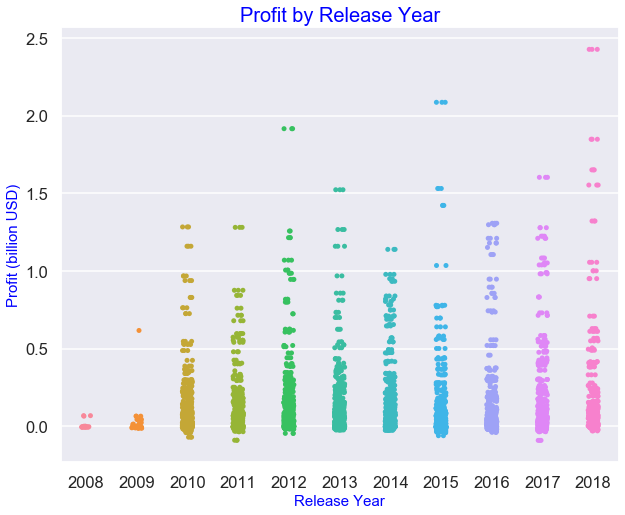

In [743]:
#Plotting the graph between overall Profit and Release year
plt.figure(figsize=(10,8))
ax1=sns.stripplot(x=df_merged.release_year, y=df_merged.Profit/1000000000, data = df_merged)
ax1.set_title('Profit by Release Year',fontsize=20,color='blue')
ax1.set_xlabel('Release Year',fontsize=15,color='blue')
ax1.set_ylabel('Profit (billion USD)',fontsize=15,color='blue');

There has been an upward trend in the Profit in the last decade which is a good sign.

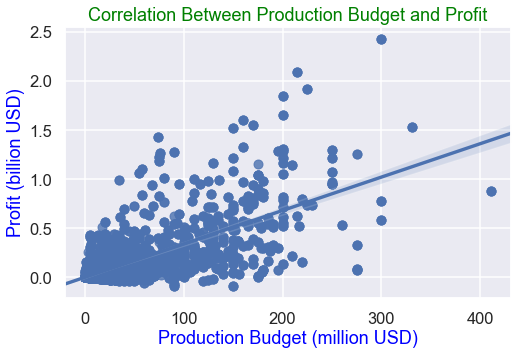

In [744]:
#Plotting the graph to see the correlation between Budget and Profit.
plt.figure(figsize=(8,5))
sns.regplot( x=df_merged.production_budget/1000000, y=df_merged.Profit/1000000000, data=df_merged)
plt.title('Correlation Between Production Budget and Profit', fontsize=18,color='green')
plt.ylabel('Profit (billion USD)', color='blue')
plt.xlabel('Production Budget (million USD)',color='blue');

There is a positive corelation between the Budget and Profit.

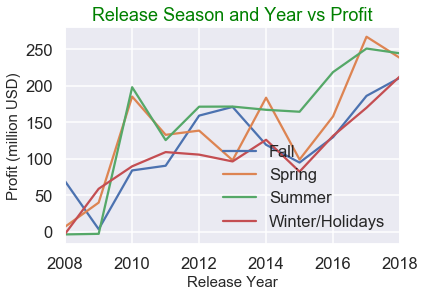

In [745]:
#Finding out the best seasons when movies do well
df_season_profit = (df_merged.groupby(['release_year','release_season'])['Profit'].mean()/1000000).sort_values(ascending=False)
df_season_profit.head()
#sns.set_context('talk')
fig = df_season_profit.unstack().plot(kind = 'line')
plt.title('Release Season and Year vs Profit',fontsize=18,color='green')
plt.xlabel('Release Year',fontsize=15)
plt.ylabel('Profit (million USD)',fontsize=15)
fig.legend(loc='lower right', frameon=False);

Summer and Spring seem to be good seasons for the Movie releases with the Fall season quite close.

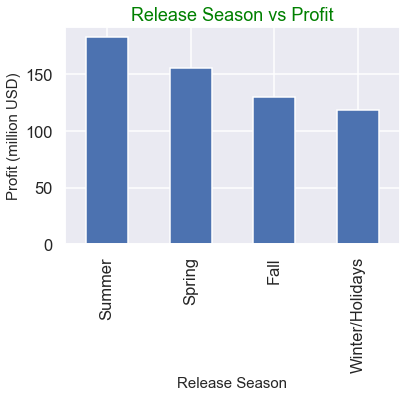

In [746]:
plt.savefig("chart1")
df_season = (df_merged.groupby(['release_season'])['Profit'].mean()/1000000).sort_values(ascending=False)
fig = df_season.plot(kind = 'bar')
plt.title('Release Season vs Profit',fontsize=18,color='green')
plt.xlabel('Release Season',fontsize=15)
plt.ylabel('Profit (million USD)',fontsize=15)
plt.rcParams["figure.figsize"] = [5, 5];

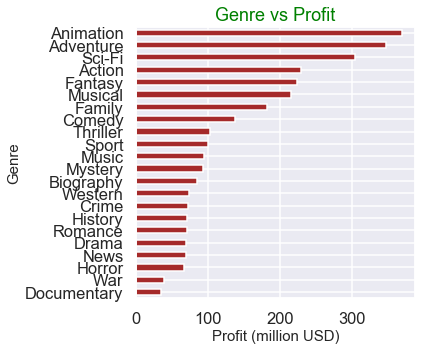

In [747]:
#Plotting a graph to see what genre gives the maximum profit
df_gen_profit = (df_merged.groupby(['genres'])['Profit'].mean()/1000000).sort_values(ascending=True)
df_gen_profit.head()
sns.set_context('talk')
fig = df_gen_profit.plot(kind = 'barh',color='brown')
plt.title('Genre vs Profit',fontsize=18,color='green')
plt.xlabel('Profit (million USD)',fontsize=15)
plt.ylabel('Genre',fontsize=15)
plt.rcParams["figure.figsize"] = [12, 8];

Our top categories seem to be Animation, Adventure,Sci-Fi and Action.

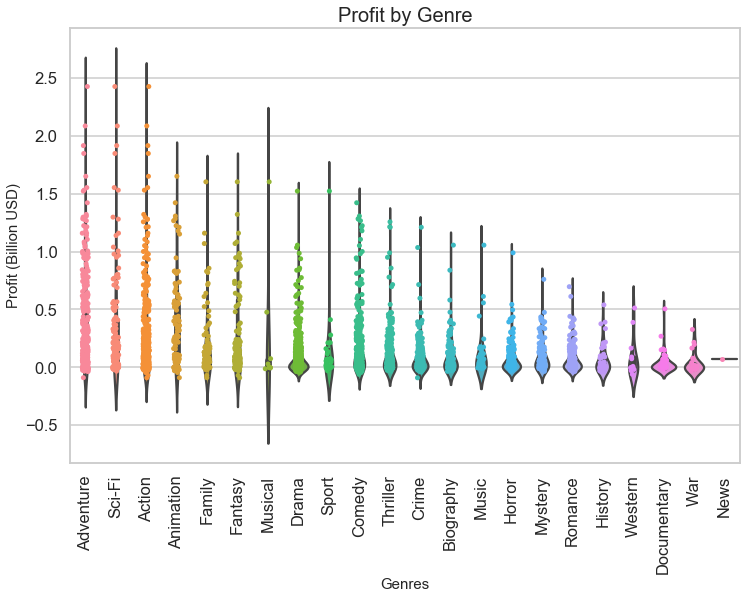

In [748]:
# Profit according to Genre
df_groupbygen=df_merged[['genres','Profit']]
df_groupbygen.info

df_groupbygen.sort_values(by=['Profit'],ascending=False)

plt.figure(figsize=(12,8))
# Set theme
sns.set_style('whitegrid')
plt.title("Profit by Genre", fontsize=20)
# Violin plot
ax=sns.violinplot(x=df_groupbygen.genres, y=df_groupbygen.Profit/1000000000, data=df_groupbygen)
ax=sns.stripplot(x=df_groupbygen.genres, y=df_groupbygen.Profit/1000000000, data=df_groupbygen)
plt.xlabel('Genres',fontsize=15)
plt.ylabel('Profit (Billion USD)',fontsize=15)
plt.xticks(rotation=90);

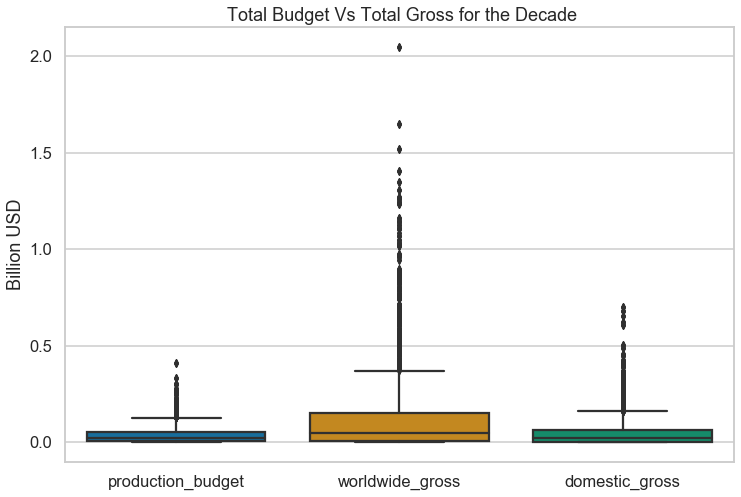

In [749]:
# Budget vs Total Gross
profit_gross_df = df_merged.filter(['production_budget', 'worldwide_gross', 'domestic_gross'], axis=1)
boxplot = sns.boxplot(data=profit_gross_df/1000000000, palette="colorblind")
boxplot.set(ylabel='Billion USD', title=' Total Budget Vs Total Gross for the Decade');

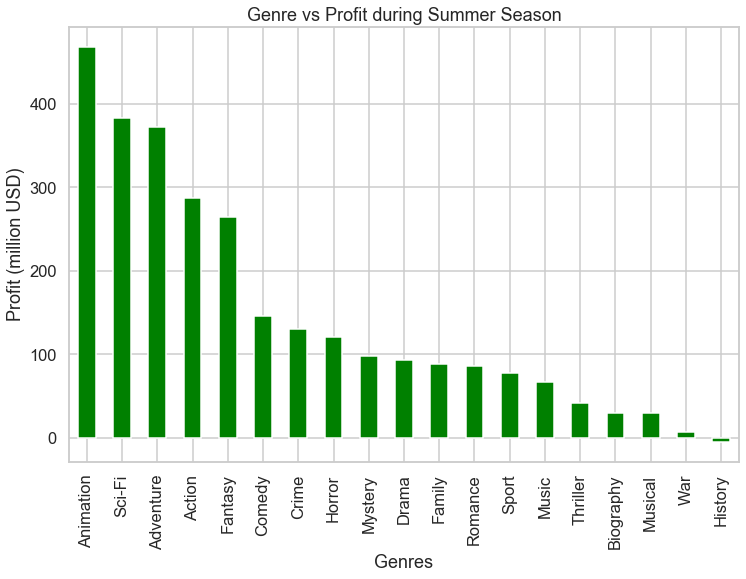

In [750]:
#To find out which are the best Genres for Summer season
df_summer=df_merged[(df_merged['Profit']) & (df_merged['release_season']=='Summer')]
df_summer_plot = (df_summer.groupby(['genres'])['Profit'].mean()/1000000).sort_values(ascending=False)
fig1 = df_summer_plot.plot(kind = 'bar',color='green')
plt.title('Genre vs Profit during Summer Season')
plt.xlabel('Genres')
plt.ylabel('Profit (million USD)')
plt.rcParams["figure.figsize"] = [8, 5];

Let us take a closer look at the Run times for these top 4 genres above later in the charts below.

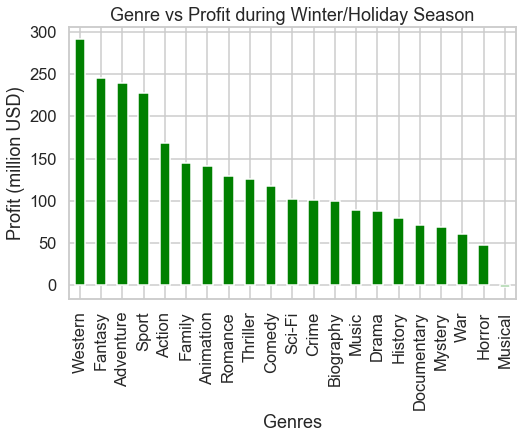

In [751]:
#To find out which are the best Genres for Winter/Holiday season
df_winter=df_merged[(df_merged['Profit']) & (df_merged['release_season']=='Winter/Holidays')]
df_winter_plot = (df_winter.groupby(['genres'])['Profit'].mean()/1000000).sort_values(ascending=False)
fig2 = df_winter_plot.plot(kind = 'bar',color='green')
plt.title('Genre vs Profit during Winter/Holiday Season')
plt.xlabel('Genres')
plt.ylabel('Profit (million USD)')
plt.rcParams["figure.figsize"] = [8, 5];

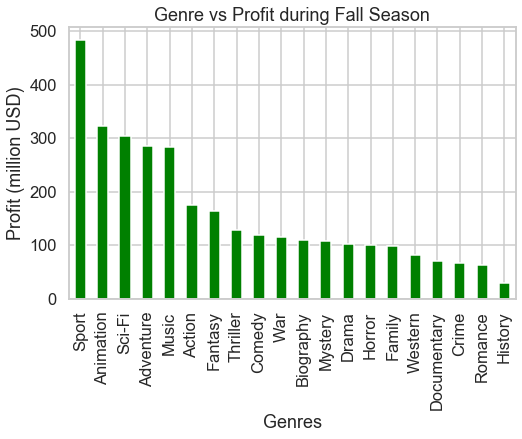

In [752]:
#To find out which are the best Genres for Fall season
df_fall=df_merged[(df_merged['Profit']) & (df_merged['release_season']=='Fall')]
df_fall_plot = (df_fall.groupby(['genres'])['Profit'].mean()/1000000).sort_values(ascending=False)
fig3 = df_fall_plot.plot(kind = 'bar',color='green')
plt.title('Genre vs Profit during Fall Season')
plt.xlabel('Genres')
plt.ylabel('Profit (million USD)')
plt.rcParams["figure.figsize"] = [8, 5];

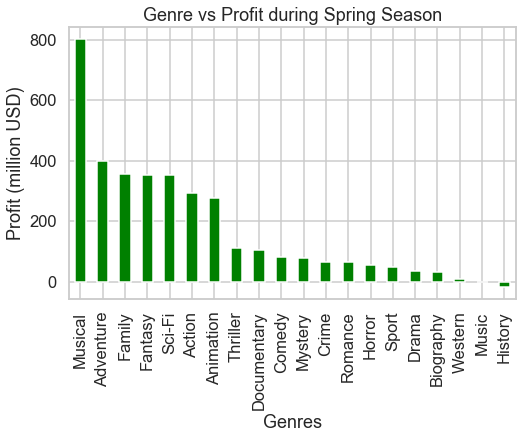

In [753]:
#To find out which are the best Genres for Spring season
df_spring=df_merged[(df_merged['Profit']) & (df_merged['release_season']=='Spring')]
df_spring_plot = (df_spring.groupby(['genres'])['Profit'].mean()/1000000).sort_values(ascending=False)
fig4 = df_spring_plot.plot(kind = 'bar',color='green')
plt.title('Genre vs Profit during Spring Season')
plt.xlabel('Genres')
plt.ylabel('Profit (million USD)')
plt.rcParams["figure.figsize"] = [8, 5];

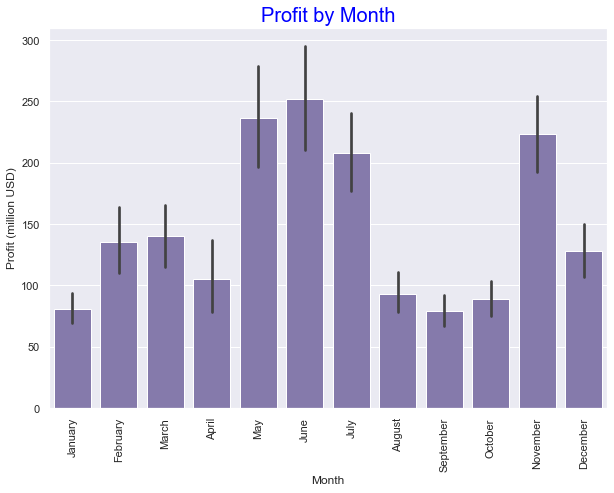

In [754]:
#Profit by Month
df_merged = df_merged.sort_values(by='release_month', ascending=True)
sns.set(rc={'figure.figsize':(10,7)}) #Setting the Chart area size
h=sns.barplot(x=df_merged.Month,y=df_merged.Profit/1000000,color="m")
h.set_xticklabels(h.get_xticklabels(),rotation=90)
h.set_title("Profit by Month", color='blue', fontsize=20) 
h.set(xlabel='Month', ylabel='Profit (million USD)')
plt.show();

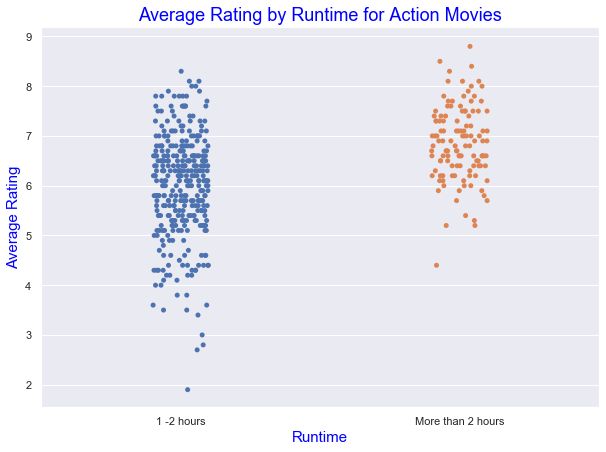

In [755]:
#Runtimesfor out Top genre movies
df_action=df_merged[(df_merged['genres']=='Action')]
df_action
ax = sns.stripplot(x="runtime_min", y="average_rating", data=df_action)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0);
ax.set_title('Average Rating by Runtime for Action Movies',fontsize=18,color='blue')
ax.set_xlabel('Runtime',fontsize=15,color='blue')
ax.set_ylabel('Average Rating',fontsize=15,color='blue');

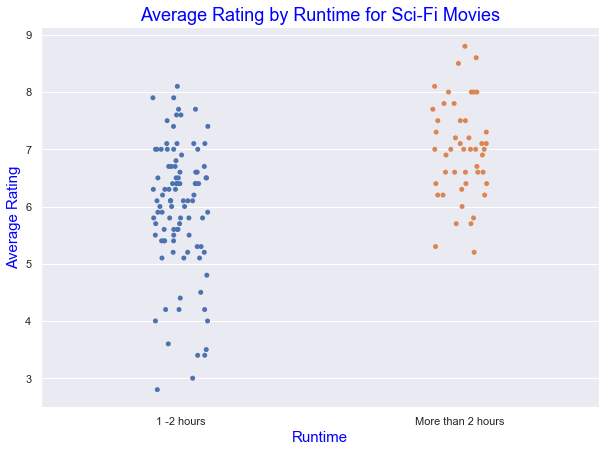

In [756]:
df_sci=df_merged[(df_merged['genres']=='Sci-Fi')]
df_sci
ax = sns.stripplot(x="runtime_min", y="average_rating", data=df_sci)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0);
ax.set_title('Average Rating by Runtime for Sci-Fi Movies',fontsize=18,color='blue')
ax.set_xlabel('Runtime',fontsize=15,color='blue')
ax.set_ylabel('Average Rating',fontsize=15,color='blue');

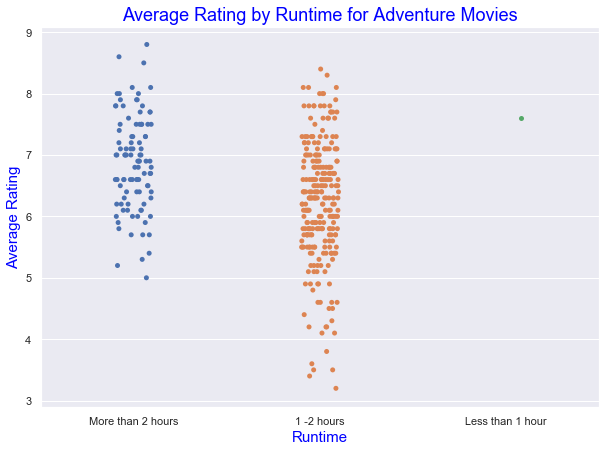

In [757]:
df_adv=df_merged[(df_merged['genres']=='Adventure')]
df_adv
ax = sns.stripplot(x="runtime_min", y="average_rating", data=df_adv)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0);
ax.set_title('Average Rating by Runtime for Adventure Movies',fontsize=18,color='blue')
ax.set_xlabel('Runtime',fontsize=15,color='blue')
ax.set_ylabel('Average Rating',fontsize=15,color='blue');

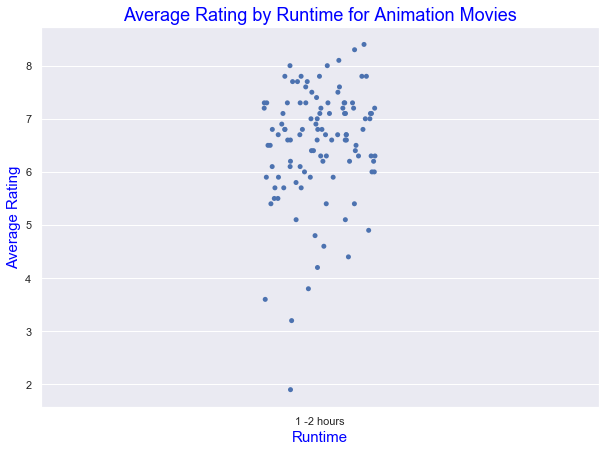

In [758]:
df_anim=df_merged[(df_merged['genres']=='Animation')]
df_anim
ax = sns.stripplot(x="runtime_min", y="average_rating", data=df_anim)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0);
ax.set_title('Average Rating by Runtime for Animation Movies',fontsize=18,color='blue')
ax.set_xlabel('Runtime',fontsize=15,color='blue')
ax.set_ylabel('Average Rating',fontsize=15,color='blue');

<h1>Conclusion</h1>
<br>
<div>
- Make an Action, Adventure, Sci-Fi or Animation movie to be most successful.<br>
- The best season for the movies to release are during Summer or Spring.<br>
- The film should be around 2-3 hours and 1-2 hours if Animation. </b>
</div>